<a href="https://colab.research.google.com/github/luiz-star/Redes_Neurais_convolucionais/blob/main/REDES_NEURAIS_CONVOLUCIONAIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Convolucionais

## Introdução

Uma Rede Neural Convolucional (ConvNet / Convolutional Neural Network / CNN) é um algoritmo de Aprendizado Profundo (Deep Learning) que pode captar uma imagem de entrada, atribuir importância (pesos e vieses que podem ser aprendidos) a vários aspectos / objetos da imagem e ser capaz de diferenciar um do outro. O pré-processamento exigido em uma CNN é muito menor em comparação com outros algoritmos de classificação. Enquanto nos métodos primitivos os filtros são feitos à mão, com treinamento suficiente, as CNNs têm a capacidade de aprender esses filtros / características.

### Por que não usar redes MLPs?

Uma imagem não é nada além de uma matriz de valores de pixels, não é mesmo? Então, por que não podemos apenas achatar a imagem (por exemplo, converter uma matriz 3×3 em um vetor 9×1) e alimentá-lo em uma rede MLP para fins de classificação?

Uma CNN é capaz de capturar com sucesso as dependências espaciais e temporais em uma imagem através da aplicação de filtros relevantes. A arquitetura executa um melhor ajuste ao conjunto de dados da imagem devido à redução no número de parâmetros envolvidos e à capacidade de reutilização dos pesos. Em outras palavras, a rede pode ser treinada para entender melhor a sofisticação da imagem. Coisa que uma rede MLP tradicional não consegue.



## Arquitetura de uma CNN

Uma Rede Neural Convolucional pode ser representada pelo seguinte diagrama:

 <center>
  <figure>
  <img src="https://pycourse.s3.amazonaws.com/cnn.jpeg"  />
    <figcaption>Figura 1 - Diagrama de uma CNN.</figcaption>
  </figure>
  </center>
  
  O diagrama da CNN descreve as três camadas básicas dessa arquitetura:
  
  1. Camada convolutiva
  2. Camada de subamostragem (pooling)
  3. Camada completamente conectada

## Camada convolutiva

A Camada convolutiva  é formada por um conjunto de filtros ou _kernels_ que são ajustados na etapa de treinamento da rede. Os filtros são matrizes pequenas, por exemplo, (3 x 3) compostas por valores reais que podem ser interpretados como pesos. Esses filtros são convoluídos com os dados de entrada para obter um mapa de características.

Os _kernels_ dão maior robustez ao modelo, eles são capazes de lidar com as variações de distorção, rotação e translação na imagem de entrada, além de reduzir o número de parâmetros livres a serem otimizados, devido ao compartilhamento dos pesos, em comparação com uma rede totalmente conectada. Uma vez extraída a característica (mapa de características), sua localização na imagem é menos importante, desde que sua posição relativa a outras características próximas seja preservada.

<center>
  <figure>
  <img src="https://pycourse.s3.amazonaws.com/conv.gif"  />
    <figcaption>Figura 2 - Operação de convolução em uma imagem.</figcaption>
  </figure>
  </center>

## Camada de subamostragem (pooling)

Na camada de _pooling_, é realizada a redução do tamanho espacial das matrizes resultantes da convolução. Consequentemente, essa técnica reduz a quantidade de parâmetros a serem aprendidos na rede, contribuindo para o controle de _overfitting_. Na Figura 3, temos o _max pooling_ de uma matriz de convolução 4 x 4. O filtro do _pooling_ abrange regiões 2 x 2.
 
 <center>
  <figure>
  <img src="https://pycourse.s3.amazonaws.com/maxpool.gif"  />
    <figcaption>Figura 3 - Max pooling.</figcaption>
  </figure>
  </center>

## Camada completamente conectada 

Após as camadas de aprendizado de características (convolução + pooling), a última camada de uma CNN é uma rede MLP tradicional: a camada é completamente conectada com a camada anterior e aceita as mesmas técnicas para melhorar o desempenho de uma rede neural artificial tradicional.

## Aplicação

Iremos agora utililizar uma CNN para classificar se uma imagem contém um cachorro ou um gato. Como estamos trabalhando com imagens, é conveniente alterarmos o hardware para GPU (**Runtime -> Change runtime type -> Hardware accelerator -> GPU**).

### Primeiro passo: inicializando a CNN

Assim como no caso das redes MLP, o objeto `Sequential` armazena a rede. Então o primeiro passo para a criação da CNN é instanciar esse objeto:

In [ ]:
%tensorflow_version 1.x

# instanciando o objeto Sequential
from keras.models import Sequential
classifier = Sequential()

TensorFlow 1.x selected.


Using TensorFlow backend.


### Segundo passo: camada de convolução

O segundo passo envolve a criação da camada convolutiva. Basicamente, nele define-se o número de kernels/filtros que serão utilizados, a dimensão do kernel, o tipo de função de ativação e a dimensão das imagens que serão recebidas. 

In [ ]:
# convolução
from keras.layers import Conv2D
n_kernels = 32
kernel_dim = (3, 3)
classifier.add(Conv2D(n_kernels,
                      kernel_dim,
                      input_shape = (64, 64, 3),
                      activation = 'relu'))


### Terceiro passo: subamostragem

O terceiro passo é a criação da camada de subamostragem. Aqui, iremos utilizar o _MaxPooling_, que recebe `pool_size` como parâmetro, usado para definir o tamanho do kernel.

In [ ]:
# subamostragem
from keras.layers import MaxPooling2D, Dropout
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# novas camadas
classifier.add(Dropout(0.5))
classifier.add(Conv2D(64,
                      kernel_dim,
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Até aqui criamos apenas uma camada de convolução e uma de pooling. Esta adição de camadas convolução/pooling pode ser continuar sendo feita para que a rede seja capaz de melhor identificar padrões. Para fins de exemplo, iremos parar por aqui.

### Quarto passo: camada totalmente conectada

Neste passo iremos criar a camada totalmente conectada. Para isso, primeiramente temos que transformar nossas imagens em um vetor, através de uma camada de achatamento.

In [ ]:
# achatamento
from keras.layers import Flatten
classifier.add(Flatten())

Em seguida, iremos criar a rede MLP tradicional com uma camada escondida com 128 neurônios e função de ativação `relu`. Como a saída é binária (cachorro ou gato), iremos utilizar a função de ativação `sigmoid` na saída.

In [ ]:
# conexão total (MLP)
from keras.layers import Dense
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Agora podemos compilar a CNN:

In [ ]:
# compilando a CNN
from keras.optimizers import RMSprop
classifier.compile(optimizer = RMSprop(lr=0.0005),
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Ajustando a rede às imagens de treino e teste

Agora iremos realizar uma etapa de pré-processamento das imagens para que ganhemos em desempenho no treinamento. Para isso, iremos utilizar uma técnica de Data Augmentation, que consiste em gerar imagens sintéticas através de uma única imagem, através de operação de rotação, translação, entre outras.

 <center>
  <figure>
  <img src="https://pycourse.s3.amazonaws.com/da.png"  />
    <figcaption>Figura 4 - Data Augmentation .</figcaption>
  </figure>
  </center>

In [ ]:
# carregando o dataset
!wget https://pycourse.s3.amazonaws.com/P14-Convolutional-Neural-Networks.zip
!unzip P14-Convolutional-Neural-Networks.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/Convolutional_Neural_Networks/dataset/training_set/dogs/._dog.2349.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/dogs/dog.235.jpg  
  inflating: __MACOSX/Convolutional_Neural_Networks/dataset/training_set/dogs/._dog.235.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/dogs/dog.2350.jpg  
  inflating: __MACOSX/Convolutional_Neural_Networks/dataset/training_set/dogs/._dog.2350.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/dogs/dog.2351.jpg  
  inflating: __MACOSX/Convolutional_Neural_Networks/dataset/training_set/dogs/._dog.2351.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/dogs/dog.2352.jpg  
  inflating: __MACOSX/Convolutional_Neural_Networks/dataset/training_set/dogs/._dog.2352.jpg  
  inflating: Convolutional_Neural_Networks/dataset/training_set/dogs/dog.2353.jpg  
  inflating: __MACOSX/Convolutional_Neural_Networks/data

In [ ]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator

# treino
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# teste
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# parâmetros
batch_size = 32
n_train = 8000
n_test = 2000
epochs = 50

In [ ]:
# gerando os conjuntos de treinamento e teste
training_set = train_datagen.flow_from_directory('Convolutional_Neural_Networks/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('Convolutional_Neural_Networks/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle=False)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Iremos agora dar o fit no modelo e avaliar as predições no conjunto de teste ao mesmo tempo.

In [ ]:
# fit no modelo e avaliação no conjunto de teste
log = classifier.fit_generator(training_set,
                               steps_per_epoch = n_train // batch_size,
                               epochs = epochs,
                               validation_data = test_set,
                               validation_steps = n_test // batch_size)


Epoch 1/50
250/250 [==============================] - 36s 146ms/step - loss: 0.7050 - accuracy: 0.5129 - val_loss: 0.6931 - val_accuracy: 0.6104
Epoch 2/50
250/250 [==============================] - 30s 120ms/step - loss: 0.6635 - accuracy: 0.5985 - val_loss: 0.6882 - val_accuracy: 0.6672
Epoch 3/50
250/250 [==============================] - 30s 120ms/step - loss: 0.6160 - accuracy: 0.6695 - val_loss: 0.5309 - val_accuracy: 0.7109
Epoch 4/50
250/250 [==============================] - 30s 120ms/step - loss: 0.5901 - accuracy: 0.6896 - val_loss: 0.5177 - val_accuracy: 0.7226
Epoch 5/50
250/250 [==============================] - 30s 120ms/step - loss: 0.5678 - accuracy: 0.7143 - val_loss: 0.5550 - val_accuracy: 0.7414
Epoch 6/50
250/250 [==============================] - 30s 119ms/step - loss: 0.5537 - accuracy: 0.7180 - val_loss: 0.5654 - val_accuracy: 0.7551
Epoch 7/50
250/250 [==============================] - 30s 119ms/step - loss: 0.5361 - accuracy: 0.7354 - val_loss: 0.6712 - val_a

In [ ]:
predicted_class = classifier.predict_generator(test_set,
                                      steps=n_test // batch_size)

In [ ]:
predicted_class

array([[0.65186167],
       [0.4938865 ],
       [0.4440471 ],
       ...,
       [0.6599327 ],
       [0.6485108 ],
       [0.58209383]], dtype=float32)

In [ ]:
test_set.class_indices

{'cats': 0, 'dogs': 1}

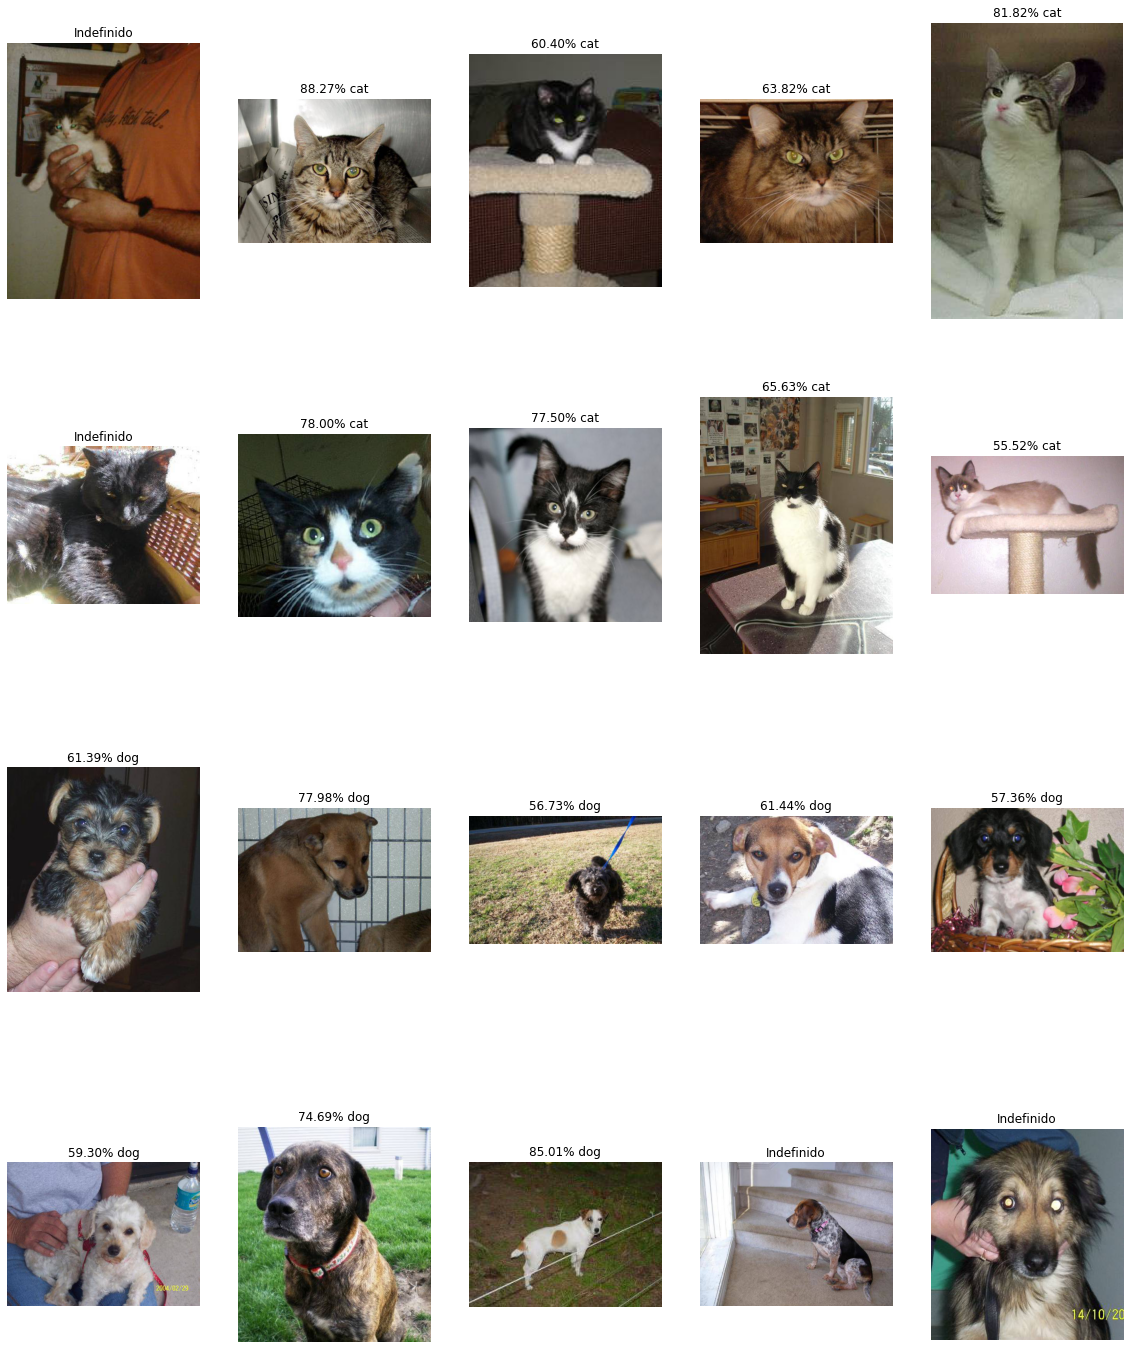

In [ ]:
# test
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# plot results
plt.figure(figsize=(20,25))
test_data_dir = "Convolutional_Neural_Networks/dataset/test_set/"
indices = np.arange(1, 2000, 100)
x, y = 5, 4
counter = 0
for i in indices:
  # image path
  image_path = test_data_dir + "/" +test_set.filenames[i]
  img = mpimg.imread(image_path)

  # show
  plt.subplot(y, x, counter+1)
  plt.imshow(img)
  plt.axis('off')
  ci = 0.05
  if predicted_class[i] >= 0.5 + ci:
    plt.title("%.2f" % (predicted_class[i]*100) + "% dog")
  elif predicted_class[i] <= 0.5 - ci:
    plt.title("%.2f" % ((1-predicted_class[i])*100) + "% cat")
  else:
    plt.title("Indefinido")
  counter += 1
plt.show()

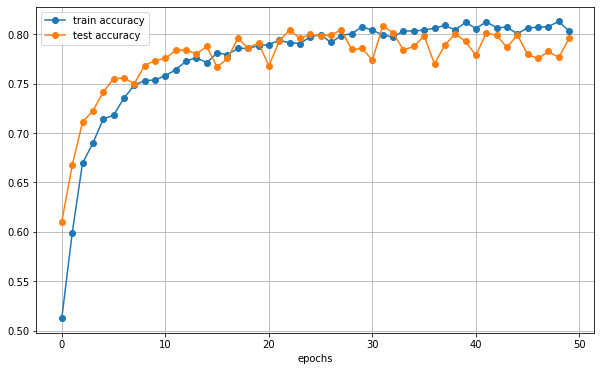

In [ ]:
# acurácia do treino e do teste
plt.figure(figsize=(10, 6))
plt.plot(log.history['accuracy'], 'o-', label='train accuracy')
plt.plot(log.history['val_accuracy'], 'o-', label='test accuracy')
plt.grid()
plt.legend()
plt.xlabel('epochs')
plt.show()